In [6]:
import torch
import pickle
from torch.utils.data import Dataset, DataLoader
import matplotlib.pyplot as plt
import numpy as np
from soft_thresholding.SoftThresholdNet import SoftThresholdNet
import sys

sys.path.append('../')

from duffing_dataset import *
from alu_dataset import *

In [7]:
dataset = "Duffing"

if dataset == "Alu":
    with open('data/alu/alu_train.pickle', 'rb') as f:
        train_data = pickle.load(f)

    with open('data/alu/alu_test.pickle', 'rb') as f:
        test_data = pickle.load(f)
        
if dataset == "Duffing":
    with open('data/duffing/duffing_train.pickle', 'rb') as f:
        train_data = pickle.load(f)

    with open('data/duffing/duffing_test.pickle', 'rb') as f:
        test_data = pickle.load(f)

In [8]:
t_train = torch.linspace(0, train_data.DT * len(train_data.x), len(train_data.y))
t_test = torch.linspace(0, test_data.DT * len(test_data.x), len(test_data.y))

train_loader = DataLoader(train_data, batch_size=100, shuffle=True)
test_loader = DataLoader(test_data, shuffle=True)

In [9]:
model = SoftThresholdNet([3, 64, 64, 64, 2], s_init=1)

In [10]:
model.train_n_epochs(data_loader=train_loader, n_epochs = 1000, lr = 0.001, weight_decay=0.0001, verbose=True)

Epoch 0: loss 4.6628947257995605
Sparsity: 0.5590930581092834 

Epoch 100: loss 0.06746523082256317
Sparsity: 0.7268562316894531 

Epoch 200: loss 0.09811722487211227
Sparsity: 0.7690319418907166 

Epoch 300: loss 0.054737769067287445
Sparsity: 0.7993420958518982 

Epoch 400: loss 0.040411777794361115
Sparsity: 0.8265977501869202 

Epoch 500: loss 0.13042114675045013
Sparsity: 0.8421052694320679 

Epoch 600: loss 0.03954658657312393
Sparsity: 0.8571428656578064 

Epoch 700: loss 0.05703749507665634
Sparsity: 0.8708881735801697 

Epoch 800: loss 0.05590781569480896
Sparsity: 0.8836935758590698 

Epoch 900: loss 0.07189764827489853
Sparsity: 0.8932095766067505 



In [16]:
y_pred = model(test_loader.dataset.x).detach().numpy()

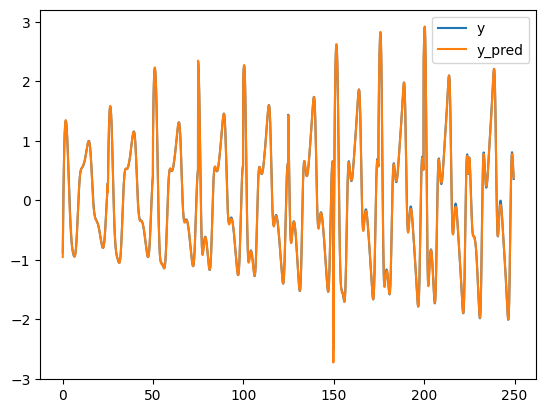

In [18]:
plt.plot(t_test, test_data.y[:, 0], label="y")
plt.plot(t_test, y_pred[:, 0], label="y_pred")
plt.legend()
plt.show()

In [19]:
s_threshhold = [layer.s.detach().item() for layer in model.layers]

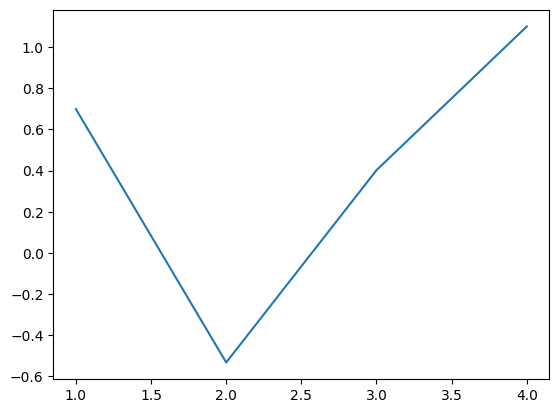

In [20]:
plt.plot(np.linspace(1, len(s_threshhold), len(s_threshhold)), s_threshhold)

In [21]:
model.get_sparsity()

0.904252827167511

In [22]:
sparsity = [layer.get_sparsity() for layer in model.layers]

In [23]:
sparsity

[tensor(0.6354), tensor(0.8809), tensor(0.9436), tensor(0.7969)]